In [3]:
!pip install keras_sequential_ascii

  Running setup.py bdist_wheel for keras-sequential-ascii ... - done
  Stored in directory: /root/.cache/pip/wheels/f5/8d/81/912666dff82a923ce423a7e797cd75f54271c7031512cdb282
Successfully built keras-sequential-ascii


In [0]:
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras_sequential_ascii import sequential_model_to_ascii_printout
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import TensorFlow
import tensorflow as tf
import multiprocessing as mp
 
# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

In [0]:
# Declare variables
 
batch_size = 32 
# 32 examples in a mini-batch, smaller batch size means more updates in one epoch
 
num_classes = 10
data_augmentation = True

In [7]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data() 

170500096/170498071 [==============================] - 106s 1us/step


In [0]:
# Convert and Preprocessing

y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255
x_test /= 255

In [0]:
def base_model():
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
    model.add(Dropout(0.2))

    model.add(Conv2D(32,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(Dropout(0.2))

    model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(1024,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))
    
    sgd = SGD(lr = 0.01, decay=1e-6, nesterov=True)

    
    # Train model 

    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [10]:
cnn_n = base_model()
cnn_n.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 16, 16)        36928     
__________

In [23]:
# Fit model - 20 epochs
 
cnn_20 = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=20, validation_data=(x_test,y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 31s 615us/step - loss: 0.0889 - acc: 0.9695 - val_loss: 0.8699 - val_acc: 0.7914
Epoch 2/20
50000/50000 [==============================] - 31s 613us/step - loss: 0.0846 - acc: 0.9700 - val_loss: 0.8969 - val_acc: 0.7934
Epoch 3/20
50000/50000 [==============================] - 31s 613us/step - loss: 0.0884 - acc: 0.9690 - val_loss: 0.8862 - val_acc: 0.7871
Epoch 4/20
50000/50000 [==============================] - 31s 612us/step - loss: 0.0847 - acc: 0.9699 - val_loss: 0.8699 - val_acc: 0.7912
Epoch 5/20
50000/50000 [==============================] - 31s 610us/step - loss: 0.0832 - acc: 0.9709 - val_loss: 0.8650 - val_acc: 0.7957
Epoch 6/20
50000/50000 [==============================] - 31s 613us/step - loss: 0.0797 - acc: 0.9721 - val_loss: 0.8781 - val_acc: 0.7920
Epoch 7/20
50000/50000 [==============================] - 31s 612us/step - loss: 0.0754 - acc: 0.9736 - val_loss: 0.

In [24]:
# Vizualizing model structure
 
sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
             Dropout    | || -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.4%
                relu   #####     32   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   16   16
              Conv2D    \|/  -------------------     18496     0.8%
                relu   #####     64   16   16
             Dropout    | || -------------------         0     0.0%
                       #####     64   16   16
              Conv2D    \|/  -------------------     36928     1.5%
                relu   #####     64   16   16
        MaxPooling2D   Y max -------------------         0     0.0%
              

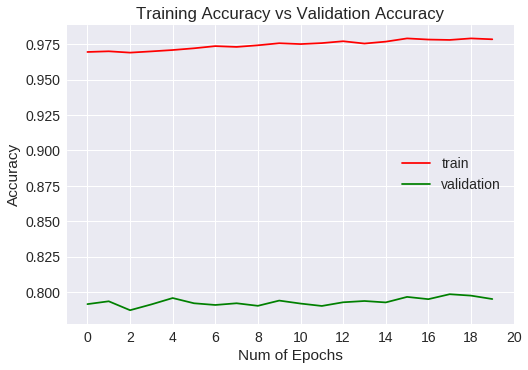

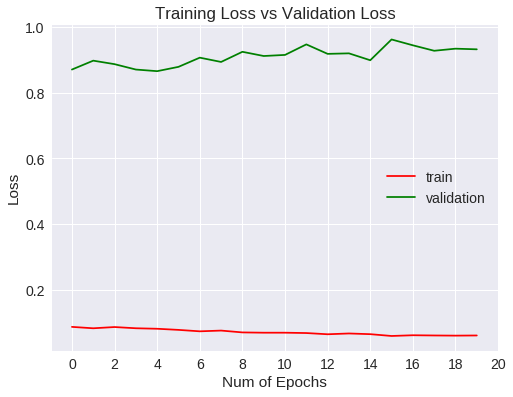

In [25]:
# Plots for training and testing process: loss and accuracy - 20 epochs
 
plt.figure(0)
plt.plot(cnn_20.history['acc'],'r')
plt.plot(cnn_20.history['val_acc'],'g')
plt.xticks(np.arange(0, 21, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn_20.history['loss'],'r')
plt.plot(cnn_20.history['val_loss'],'g')
plt.xticks(np.arange(0, 21, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[822   9  33   8   9   4  14   7  65  29]
 [ 11 900   4   3   1   2   7   3  19  50]
 [ 48   6 725  38  48  31  63  21  17   3]
 [ 15   5  63 578  47 148  83  30  16  15]
 [ 14   2  64  37 755  26  49  46   6   1]
 [ 12   4  31 131  38 698  35  39   5   7]
 [  5   3  26  32  18  18 889   0   5   4]
 [ 18   3  30  17  39  37   5 845   0   6]
 [ 30  17  10   7   7   5   5   2 904  13]
 [ 24  69   2  18   3   4  17   9  20 834]]


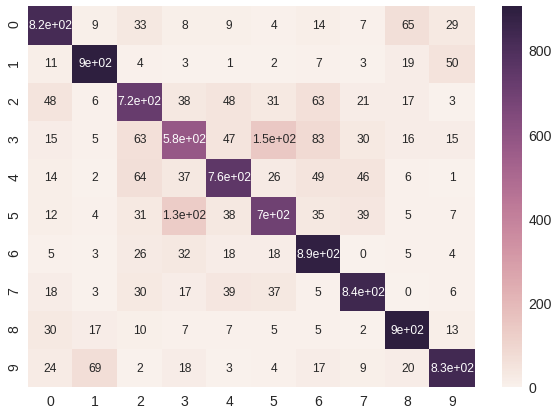

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [18]:
# Model with epoch = 50

cnn2 = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=50, validation_data=(x_test,y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 31s 629us/step - loss: 0.6670 - acc: 0.7673 - val_loss: 0.7395 - val_acc: 0.7417
Epoch 2/50
50000/50000 [==============================] - 31s 617us/step - loss: 0.6374 - acc: 0.7770 - val_loss: 0.7496 - val_acc: 0.7418
Epoch 3/50
50000/50000 [==============================] - 31s 614us/step - loss: 0.6118 - acc: 0.7842 - val_loss: 0.7199 - val_acc: 0.7497
Epoch 4/50
50000/50000 [==============================] - 30s 607us/step - loss: 0.5882 - acc: 0.7919 - val_loss: 0.7155 - val_acc: 0.7503
Epoch 5/50
50000/50000 [==============================] - 31s 610us/step - loss: 0.5615 - acc: 0.8030 - val_loss: 0.7263 - val_acc: 0.7471
Epoch 6/50
50000/50000 [==============================] - 31s 613us/step - loss: 0.5359 - acc: 0.8103 - val_loss: 0.6999 - val_acc: 0.7567
Epoch 7/50
50000/50000 [==============================] - 31s 611us/step - loss: 0.5173 - acc: 0.8179 - val_loss: 0.

In [19]:
# Vizualizing model structure
 
sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
             Dropout    | || -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.4%
                relu   #####     32   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   16   16
              Conv2D    \|/  -------------------     18496     0.8%
                relu   #####     64   16   16
             Dropout    | || -------------------         0     0.0%
                       #####     64   16   16
              Conv2D    \|/  -------------------     36928     1.5%
                relu   #####     64   16   16
        MaxPooling2D   Y max -------------------         0     0.0%
              

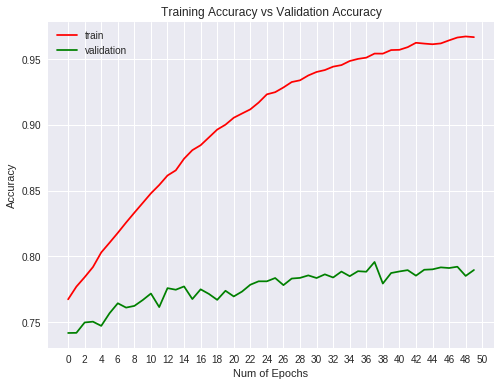

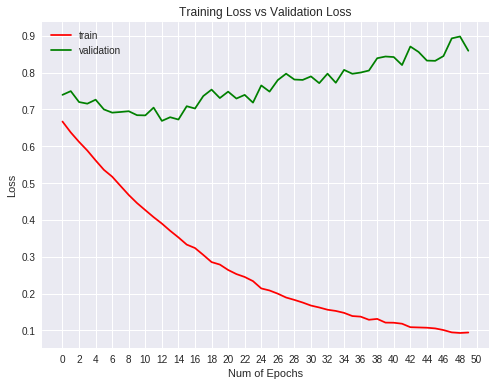

In [21]:
# Plots for training and testing process: loss and accuracy - 50 epochs
 
plt.figure(0)
plt.plot(cnn2.history['acc'],'r')
plt.plot(cnn2.history['val_acc'],'g')
plt.xticks(np.arange(0, 51, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn2.history['loss'],'r')
plt.plot(cnn2.history['val_loss'],'g')
plt.xticks(np.arange(0, 51, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[778  21  56  13  15   4  13   9  61  30]
 [  5 903   0   3   0   1   9   1  12  66]
 [ 42   7 679  51  45  44  82  28  13   9]
 [ 13  10  40 602  45 173  57  31  11  18]
 [ 15   2  62  35 738  34  51  54   4   5]
 [ 10   5  22 122  33 740  21  33   3  11]
 [  4   6  14  37  14  25 885   2   7   6]
 [ 12   2  14  30  37  52   6 838   0   9]
 [ 30  31  10  11   9   5   3   2 878  21]
 [ 21  66   3  18   2   9   7   7  12 855]]


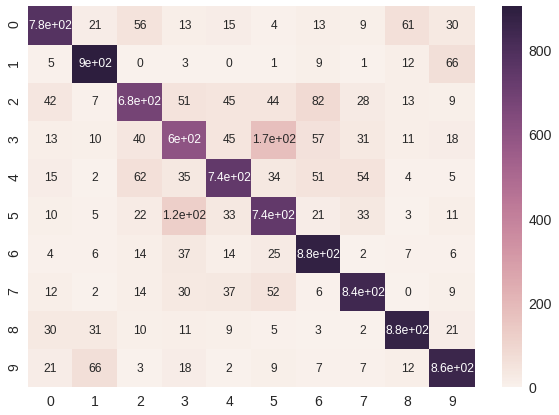

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()

In [27]:
# Model with epoch = 100

cnn_100 = cnn_n.fit(x_train, y_train, batch_size=batch_size, epochs=100, validation_data=(x_test,y_test),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 31s 624us/step - loss: 0.0566 - acc: 0.9801 - val_loss: 0.9284 - val_acc: 0.7950
Epoch 2/100
50000/50000 [==============================] - 31s 614us/step - loss: 0.0578 - acc: 0.9805 - val_loss: 0.9625 - val_acc: 0.7938
Epoch 3/100
50000/50000 [==============================] - 31s 613us/step - loss: 0.0573 - acc: 0.9797 - val_loss: 0.9563 - val_acc: 0.7909
Epoch 4/100
50000/50000 [==============================] - 31s 613us/step - loss: 0.0546 - acc: 0.9815 - val_loss: 0.9777 - val_acc: 0.7956
Epoch 5/100
50000/50000 [==============================] - 31s 612us/step - loss: 0.0547 - acc: 0.9808 - val_loss: 0.9928 - val_acc: 0.7941
Epoch 6/100
50000/50000 [==============================] - 31s 611us/step - loss: 0.0522 - acc: 0.9823 - val_loss: 0.9395 - val_acc: 0.7967
Epoch 7/100
50000/50000 [==============================] - 31s 612us/step - loss: 0.0525 - acc: 0.9810 - val_l

In [28]:
# Vizualizing model structure
 
sequential_model_to_ascii_printout(cnn_n)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####      3   32   32
              Conv2D    \|/  -------------------       896     0.0%
                relu   #####     32   32   32
             Dropout    | || -------------------         0     0.0%
                       #####     32   32   32
              Conv2D    \|/  -------------------      9248     0.4%
                relu   #####     32   32   32
        MaxPooling2D   Y max -------------------         0     0.0%
                       #####     32   16   16
              Conv2D    \|/  -------------------     18496     0.8%
                relu   #####     64   16   16
             Dropout    | || -------------------         0     0.0%
                       #####     64   16   16
              Conv2D    \|/  -------------------     36928     1.5%
                relu   #####     64   16   16
        MaxPooling2D   Y max -------------------         0     0.0%
              

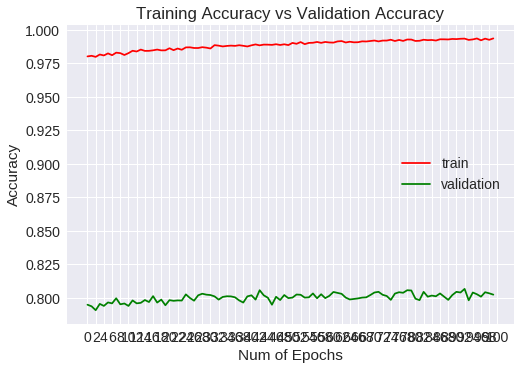

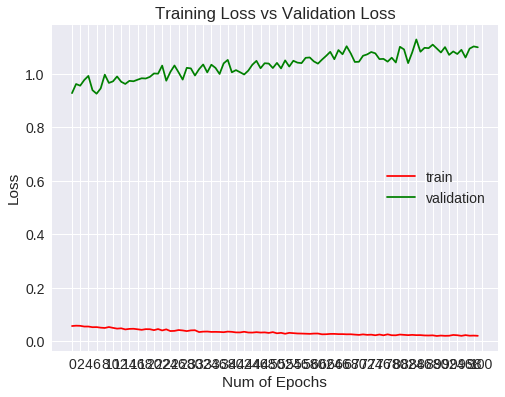

In [29]:
# Plots for training and testing process: loss and accuracy - 100 epochs
 
plt.figure(0)
plt.plot(cnn_100.history['acc'],'r')
plt.plot(cnn_100.history['val_acc'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
 
 
plt.figure(1)
plt.plot(cnn_100.history['loss'],'r')
plt.plot(cnn_100.history['val_loss'],'g')
plt.xticks(np.arange(0, 101, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

0 1000
1 1000
2 1000
3 1000
4 1000
5 1000
6 1000
7 1000
8 1000
9 1000
[[851  11  22   9   9   5   8  15  46  24]
 [  6 922   1   3   3   1   1   3  15  45]
 [ 52   4 699  57  62  36  40  27  16   7]
 [ 14  10  45 636  50 123  46  37  20  19]
 [ 11   4  70  45 747  23  20  72   6   2]
 [  9   5  30 156  37 682  17  47   4  13]
 [  8   9  34  46  25  18 840   4   6  10]
 [ 10   2  18  29  25  31   2 880   0   3]
 [ 30  19   9   7   4   2   2   4 909  14]
 [ 20  68   5  13   1   3   4   8  19 859]]


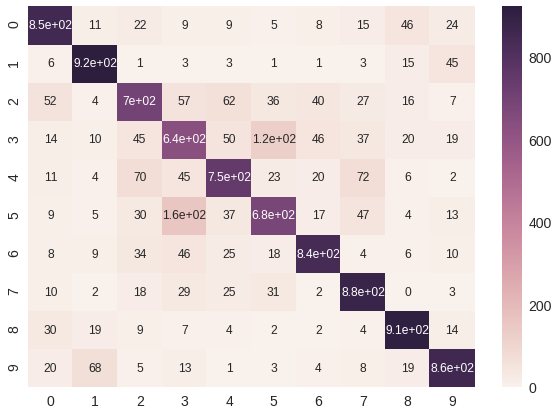

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
Y_pred = cnn_n.predict(x_test, verbose=2)
y_pred = np.argmax(Y_pred, axis=1)
 
for ix in range(10):
    print(ix, confusion_matrix(np.argmax(y_test,axis=1),y_pred)[ix].sum())
cm = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
print(cm)
 
# Visualizing of confusion matrix
import seaborn as sn
import pandas  as pd
 
 
df_cm = pd.DataFrame(cm, range(10),
                  range(10))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.show()